<a href="https://colab.research.google.com/github/seon0415/BDA/blob/main/%EB%B0%95%EC%84%9C%EC%97%B029_0521_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime

##datetime 이용하기

In [16]:
#날짜
date=datetime.date(year=2023, month=4, day=20)
date

datetime.date(2023, 4, 20)

In [5]:
#시간
time=datetime.time(hour=10, minute=20, second=10)
time

datetime.time(10, 20, 10)

In [13]:
#timedelta
td = datetime.timedelta(days=20, hours=10)
td

datetime.timedelta(days=20, seconds=36000)

In [17]:
print(date+td)

2023-05-10


In [18]:
#pandas
pd.to_datetime('2023-05-21')

Timestamp('2023-05-21 00:00:00')

In [25]:
a=pd.Series(['2023-05-10', '2023/5/11', '2023.05.12'])
pd.to_datetime(a)

0   2023-05-10
1   2023-05-11
2   2023-05-12
dtype: datetime64[ns]

In [26]:
b=pd.Series(['2023-05-10', '2023/4/31'])
pd.to_datetime(b, errors='coerce')
#정상적이지 않은 값은 na로 변환

0   2023-05-10
1          NaT
dtype: datetime64[ns]

##CRIME 데이터 

###1. datetime형식인지 확인하기

In [36]:
crime= pd.read_csv('crime.csv')

In [32]:
crime.head(10)

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0.0,1.0
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1.0,0.0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1.0,0.0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1.0,0.0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1.0,0.0
5,5,violation-of-restraining-order,all-other-crimes,2014-06-29 04:22:00,-104.972447,39.739449,cheesman-park,1.0,0.0
6,6,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:56:00,-105.052956,39.733315,villa-park,0.0,1.0
7,7,assault-dv,other-crimes-against-persons,2014-06-29 04:54:00,-104.994621,39.746857,cbd,1.0,0.0
8,8,criminal-mischief-mtr-veh,public-disorder,2014-01-20 08:29:00,-104.977522,39.781310,globeville,1.0,0.0
9,9,criminal-trespassing,all-other-crimes,2014-06-29 03:56:00,-104.956140,39.741610,city-park,1.0,0.0


In [41]:
#날짜컬럼을 날짜형식으로 바꾸기(데이터 값이 datetime로 꼭 변경이 되어야만 시계열 데이터로 사용할 수 있어서)
crime['REPORTED_DATE']=pd.to_datetime(crime['REPORTED_DATE'])
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416549 entries, 0 to 416548
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           416549 non-null  int64         
 1   OFFENSE_TYPE_ID      416549 non-null  object        
 2   OFFENSE_CATEGORY_ID  416549 non-null  object        
 3   REPORTED_DATE        416549 non-null  datetime64[ns]
 4   GEO_LON              413024 non-null  float64       
 5   GEO_LAT              413024 non-null  float64       
 6   NEIGHBORHOOD_ID      416549 non-null  object        
 7   IS_CRIME             416548 non-null  float64       
 8   IS_TRAFFIC           416548 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 28.6+ MB


In [42]:
#날짜컬럼을 인덱스로 설정하기
crime_df=crime.set_index('REPORTED_DATE')
crime_df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0.0,1.0
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1.0,0.0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1.0,0.0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1.0,0.0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1.0,0.0
...,...,...,...,...,...,...,...,...
2013-05-29 21:48:00,416544,assault-simple,other-crimes-against-persons,-105.020067,39.710910,athmar-park,1.0,0.0
2012-11-11 07:42:00,416545,burglary-residence-by-force,burglary,-105.052059,39.729155,villa-park,1.0,0.0
2013-03-29 21:08:00,416546,theft-parts-from-vehicle,theft-from-motor-vehicle,-105.036067,39.787734,regis,1.0,0.0


###2. loc이용해서 추출하기

####날짜

In [46]:
#연도기준
crime_df.loc['2014'].sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,214696,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1.0,0.0
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1.0,0.0
2014-01-01 00:38:00,224109,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1.0,0.0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1.0,0.0
2014-01-01 01:00:00,236308,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-12-31 23:59:00,126879,theft-of-motor-vehicle,auto-theft,-105.031583,39.712121,barnum,1.0,0.0
2014-12-31 23:59:00,226091,weapon-carrying-concealed,all-other-crimes,-105.017647,39.718170,valverde,1.0,0.0
2014-12-31 23:59:00,97411,assault-dv,other-crimes-against-persons,-105.017647,39.718170,valverde,1.0,0.0


In [49]:
#월기준
crime_df.loc['2014-09'].sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-09-01 00:03:00,208966,disturbing-the-peace,public-disorder,-104.958341,39.675299,university-park,1.0,0.0
2014-09-01 00:07:00,207496,drug-pcs-other-drug,drug-alcohol,-104.990480,39.728076,lincoln-park,1.0,0.0
2014-09-01 00:11:00,220517,traf-other,all-other-crimes,-104.981015,39.740190,north-capitol-hill,1.0,0.0
2014-09-01 00:26:00,220522,traffic-accident,traffic-accident,-104.906738,39.634141,hampden-south,0.0,1.0
2014-09-01 00:36:00,165723,criminal-trespassing,all-other-crimes,-105.004154,39.738113,lincoln-park,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-09-30 23:07:00,211579,public-order-crimes-other,all-other-crimes,-104.985958,39.703746,washington-park-west,1.0,0.0
2014-09-30 23:09:00,211577,police-false-information,all-other-crimes,-104.888654,39.779819,stapleton,1.0,0.0
2014-09-30 23:09:00,100248,theft-shoplift,larceny,-104.888654,39.779819,stapleton,1.0,0.0


In [51]:
#일기준
crime_df.loc['2014-09-13'].count()

Unnamed: 0             204
OFFENSE_TYPE_ID        204
OFFENSE_CATEGORY_ID    204
GEO_LON                202
GEO_LAT                202
NEIGHBORHOOD_ID        204
IS_CRIME               204
IS_TRAFFIC             204
dtype: int64

####시간
- between_time
- at_time

In [52]:
crime_dt=crime_df.loc['2014'].sort_index()

In [57]:
crime_dt.between_time('13:00', '15:00')['Unnamed: 0'].count()

9628

In [54]:
#시간 사이
crime_dt.between_time('13:00', '15:00')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 13:08:00,1251,traffic-accident,traffic-accident,-104.912616,39.651368,hampden-south,0.0,1.0
2014-01-01 13:54:00,146990,burglary-residence-no-force,burglary,-104.977279,39.694618,washington-park-west,1.0,0.0
2014-01-01 13:55:00,200314,burglary-business-by-force,burglary,-105.022611,39.792059,chaffee-park,1.0,0.0
2014-01-01 14:22:00,133765,liquor-possession,drug-alcohol,-104.973097,39.740032,capitol-hill,1.0,0.0
2014-01-01 14:28:00,137563,assault-dv,other-crimes-against-persons,-105.018501,39.782714,sunnyside,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-12-31 14:48:00,138208,burglary-residence-by-force,burglary,-105.022348,39.699098,athmar-park,1.0,0.0
2014-12-31 14:50:00,222501,traffic-accident,traffic-accident,-104.998902,39.711204,baker,0.0,1.0
2014-12-31 14:58:00,303463,traffic-accident-hit-and-run,traffic-accident,-105.021735,39.731202,sun-valley,0.0,1.0


In [59]:
#시간 정각
crime_dt.at_time('17:50')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-06 17:50:00,114954,theft-shoplift,larceny,-104.992734,39.745315,cbd,1.0,0.0
2014-01-06 17:50:00,231834,traffic-accident,traffic-accident,-105.016530,39.751320,jefferson-park,0.0,1.0
2014-01-07 17:50:00,2255,burglary-residence-no-force,burglary,-104.842046,39.781130,montbello,1.0,0.0
2014-01-26 17:50:00,84974,traf-other,all-other-crimes,-104.965953,39.758239,whittier,1.0,0.0
2014-01-27 17:50:00,133303,traffic-accident-hit-and-run,traffic-accident,-105.036926,39.776727,berkeley,0.0,1.0
...,...,...,...,...,...,...,...,...
2014-12-12 17:50:00,215438,burglary-residence-by-force,burglary,-104.975527,39.763097,five-points,1.0,0.0
2014-12-13 17:50:00,156529,traffic-accident-hit-and-run,traffic-accident,-105.025061,39.696746,mar-lee,0.0,1.0
2014-12-18 17:50:00,232266,public-order-crimes-other,all-other-crimes,-104.991301,39.741745,cbd,1.0,0.0


In [62]:
#처음부터 5일동안
crime_dt.first('5D')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,214696,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1.0,0.0
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1.0,0.0
2014-01-01 00:38:00,224109,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1.0,0.0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1.0,0.0
2014-01-01 01:00:00,236308,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-01-05 23:21:00,248473,traffic-accident,traffic-accident,-104.979160,39.779675,globeville,0.0,1.0
2014-01-05 23:28:00,235140,weapon-carrying-concealed,all-other-crimes,-104.815367,39.793922,montbello,1.0,0.0
2014-01-05 23:28:00,235141,drug-cocaine-possess,drug-alcohol,-104.815367,39.793922,montbello,1.0,0.0


###3. resample(월별, 일별, 주별 값을 계산)

In [64]:
crime_sp=crime_dt[['IS_CRIME']]
crime_sp

,IS_CRIME
REPORTED_DATE,
2014-01-01 00:08:00,1.0
2014-01-01 00:08:00,1.0
2014-01-01 00:38:00,1.0
2014-01-01 00:39:00,1.0
2014-01-01 01:00:00,1.0
...,...
2014-12-31 23:59:00,1.0
2014-12-31 23:59:00,1.0
2014-12-31 23:59:00,1.0


In [74]:
crime_sp.loc['2014-01-01':'2014-01-05'].count()

IS_CRIME    884
dtype: int64

In [75]:
crime_sp.loc['2014-01-01':'2014-01-05'].value_counts()

IS_CRIME
1.0         616
0.0         268
dtype: int64

In [81]:
crime_sp2=crime_dt[['IS_CRIME','IS_TRAFFIC']]

####주별로 계산

In [66]:
crime_sp.resample('W').sum()

,IS_CRIME
REPORTED_DATE,
2014-01-05,616.0
2014-01-12,1014.0
2014-01-19,1096.0
2014-01-26,1079.0
2014-02-02,911.0
2014-02-09,945.0
2014-02-16,1256.0
2014-02-23,1312.0
2014-03-02,1150.0


In [78]:
crime_sp2.resample('W').sum()
#'IS_CRIME'이랑'IS_TRAFFIC'은 서로 반대임

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-05,616.0,268.0
2014-01-12,1014.0,397.0
2014-01-19,1096.0,327.0
2014-01-26,1079.0,349.0
2014-02-02,911.0,439.0
2014-02-09,945.0,481.0
2014-02-16,1256.0,394.0
2014-02-23,1312.0,358.0
2014-03-02,1150.0,404.0


####월별로 계산

In [83]:
crime_sp2.resample('M').sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-31,4530.0,1678.0
2014-02-28,4571.0,1646.0
2014-03-31,5338.0,1695.0
2014-04-30,5032.0,1671.0
2014-05-31,5394.0,1765.0
2014-06-30,5383.0,1789.0
2014-07-31,5729.0,1862.0
2014-08-31,5913.0,1899.0
2014-09-30,5686.0,1973.0


####연별로 계산

In [84]:
crime_sp2.resample('Y').sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-12-31,62596.0,21761.0


###4. 시계열 그래프

<Axes: xlabel='REPORTED_DATE'>

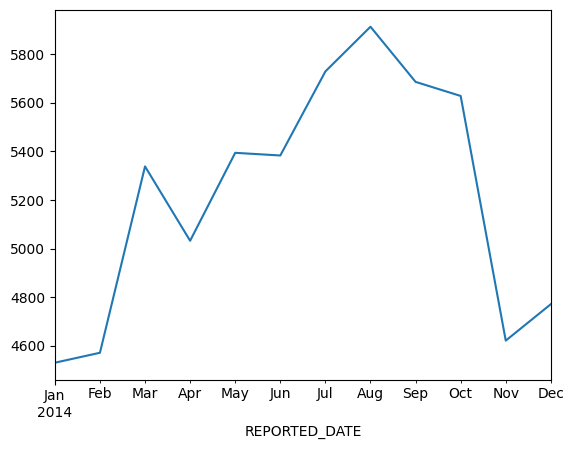

In [93]:
crime_mon=crime_dt['IS_CRIME'].resample('M').sum()
crime_mon.plot()

<Axes: xlabel='REPORTED_DATE'>

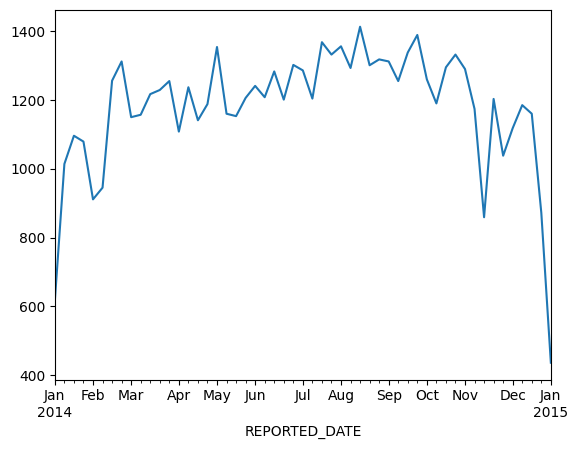

In [94]:
crime_mon=crime_dt['IS_CRIME'].resample('W').sum()
crime_mon.plot()

##  필수과제1
- 시계열데이터 문법, 리서치 하셔서 정리하시고 최소 5개 이상 문법 찾아서 코드와 주석처리 해주시면 됩니다.
- offsets, first 근로기준의 날 뽑을 수도 있고, 첫주의 월요일만 뽑을 수 있음

In [101]:
#2016년 첫주의 월요일
for month in range(1, 13):
    # 해당 월의 첫 날짜와 마지막 날짜 구하기
    start_date = pd.to_datetime(f'2016-{month}-01')
    end_date = start_date + pd.offsets.MonthEnd()

    # 첫 주 월요일 구하기
    first_monday = start_date + pd.offsets.WeekOfMonth(week=0, weekday=0)

    # 첫 주 월요일의 날짜 출력
    print(f"{start_date.strftime('%Y-%m')}: {first_monday.day}")

2016-01: 4
2016-02: 7
2016-03: 7
2016-04: 4
2016-05: 2
2016-06: 6
2016-07: 4
2016-08: 5
2016-09: 5
2016-10: 3
2016-11: 7
2016-12: 5


In [103]:
import pandas as pd

for month in range(1, 13):
    # 해당 월의 첫 날짜와 마지막 날짜 구하기
    start_date = pd.to_datetime(f'2016-{month}-01')
    end_date = start_date + pd.offsets.MonthEnd()

    # 첫 주 월요일 구하기
    first_monday = pd.date_range(start_date, end_date, freq='W-MON').first()

    # 첫 주 월요일의 날짜 출력
    print(f"{start_date.strftime('%Y-%m')}: {first_monday.day}")


AttributeError: ignored

## 필수과제2 
- crime 데이터를 가지고 시계열 데이터 분석을 진행해 주세요.
- 제공된 컬럼을 가지고 범죄건과 비교해서 시계열 데이터 분석을 진행해 주세요!
- ex) OFFENSE_TYPE_ID 해당 컬럼과 범죄건수와 시계열적인 패턴까지 다 엮어서 어떤식으로 되는지 비교분석이 가능하다.

In [ ]:
crime

In [ ]:
crime['IS_CRIME'].value_counts()

1.0    80480
0.0    32003
Name: IS_CRIME, dtype: int64